# Розвиток громадських організацій через призму активності населення

---

## Підготовка пакетів

In [1]:
#install.packages("psych")

In [2]:
library(tidyverse)
library(psych)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.3.6      v purrr   0.3.4 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha




In [3]:
Sys.setlocale("LC_CTYPE", "ukrainian") 
options(warn = -1)

[1] "Ukrainian_Ukraine.1251"

## Завантаження даних

In [4]:
survey_data <- readRDS("survey_data_init.rds")
survey_headers <- readRDS("survey_headers.rds")

In [13]:
head(survey_data, 2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,16-23 років,Жіноча,Працюючий,"Так, інколи","Орієнтуюсь, приймав/ла участь в одній організації",Так,Молодіжна організація,-,Ні,Так,"Так, декілька",Творчі об'єднання,"Так, оскільки за допомогою них можна реалізувати себе","Так, за умови відсутності пропаганди діяльності цієї організації"
2,16-23 років,Жіноча,Студент,"Так, інколи","Не сильно, щось чув/ла, але не цікавився/лася.",Ні,-,-,Ні,Ні,"Ні, жодного",Молодіжна організація,"Так, оскільки вони покликані допомагати",Якщо це законно і відстоює благодійні справи


## Factor to numeric

In [10]:
survey_numeric <- survey_data |>
    mutate_if(is.factor, as.numeric)
head(survey_numeric)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,3,3,6,2,7,1,1,2,2,8,5,7
2,1,2,4,3,5,1,1,1,1,1,1,7,4,8
3,1,2,4,3,1,2,7,1,1,2,1,7,5,7
4,1,2,4,2,1,1,1,1,1,1,2,7,4,6
5,1,2,4,3,1,1,1,3,1,1,1,8,5,4
6,1,2,4,3,1,1,1,4,1,2,2,7,4,6


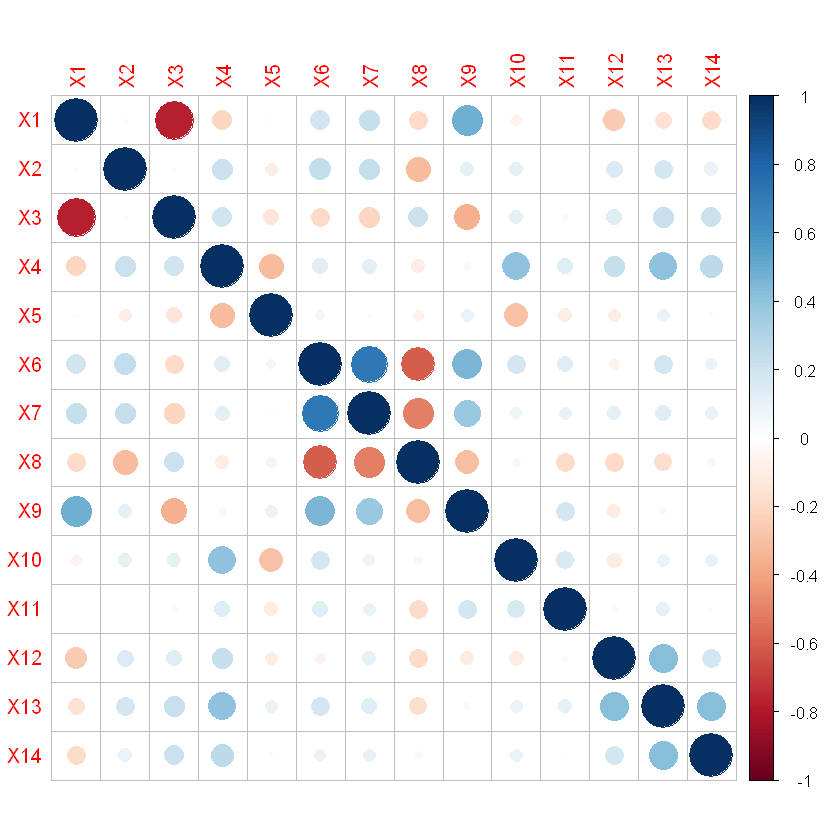

In [18]:
library(corrplot)
corrplot(cor(survey_numeric))

In [20]:
round(cor(survey_numeric),2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
X1,1.00,0.01,-0.78,-0.21,-0.02,0.20,0.24,-0.19,0.49,-0.07,0.00,-0.25,-0.15,-0.18
X2,0.01,1.00,-0.01,0.22,-0.09,0.25,0.23,-0.31,0.10,0.10,0.00,0.15,0.18,0.10
X3,-0.78,-0.01,1.00,0.20,-0.13,-0.19,-0.22,0.21,-0.36,0.10,0.02,0.13,0.22,0.21
X4,-0.21,0.22,0.20,1.00,-0.32,0.13,0.12,-0.10,-0.04,0.40,0.13,0.24,0.40,0.27
X5,-0.02,-0.09,-0.13,-0.32,1.00,0.05,0.01,-0.07,0.09,-0.30,-0.10,-0.09,0.09,0.02
X6,0.20,0.25,-0.19,0.13,0.05,1.00,0.72,-0.61,0.46,0.18,0.13,-0.06,0.18,0.08
X7,0.24,0.23,-0.22,0.12,0.01,0.72,1.00,-0.50,0.37,0.07,0.09,0.10,0.14,0.09
X8,-0.19,-0.31,0.21,-0.10,-0.07,-0.61,-0.50,1.00,-0.31,-0.05,-0.19,-0.19,-0.17,-0.04
X9,0.49,0.10,-0.36,-0.04,0.09,0.46,0.37,-0.31,1.00,0.00,0.18,-0.10,0.03,0.00
X10,-0.07,0.10,0.10,0.40,-0.30,0.18,0.07,-0.05,0.00,1.00,0.17,-0.11,0.09,0.09


In [21]:
alpha(survey_numeric, check.keys=TRUE)


Reliability analysis   
Call: alpha(x = survey_numeric, check.keys = TRUE)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean   sd median_r
      0.54      0.64    0.77      0.11 1.8 0.063  3.2 0.56    0.098

    95% confidence boundaries 
         lower alpha upper
Feldt     0.38  0.54  0.67
Duhachek  0.41  0.54  0.66

 Reliability if an item is dropped:
    raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r med.r
X1       0.54      0.64    0.73     0.118 1.7    0.064 0.036 0.101
X2       0.52      0.62    0.76     0.111 1.6    0.066 0.048 0.094
X3-      0.54      0.64    0.74     0.118 1.7    0.064 0.037 0.100
X4       0.52      0.63    0.75     0.115 1.7    0.066 0.042 0.094
X5       0.59      0.67    0.78     0.137 2.1    0.055 0.043 0.123
X6       0.50      0.57    0.70     0.091 1.3    0.069 0.039 0.093
X7       0.44      0.57    0.72     0.094 1.3    0.081 0.041 0.091
X8-      0.43      0.57    0.72     0.094 1.3    0.079 0.043 0.093
X9       0.53      0.60    0.74  

In [23]:
install.packages("likert")

package 'likert' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	D:\Temp\RtmpsLUht3\downloaded_packages


In [25]:
library(likert)

In [26]:
survey_data |> likert()

ERROR: Error in likert(survey_data): All items (columns) must have the same number of levels


In [6]:
cluster.results <- kmodes(survey_data, 3, iter.max = 10, weighted = FALSE )
cluster.results

ERROR: Error in kmodes(survey_data, 3, iter.max = 10, weighted = FALSE): could not find function "kmodes"
